In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from scipy import signal

In [2]:
sshData = xr.open_dataset('curtain_SSH_SVB_febTS.nc')
sshData_noSVB = xr.open_dataset('curtain_SSH_NoSVB_febTS.nc')

Text(0.5, 1.0, 'SVB - No SVB')

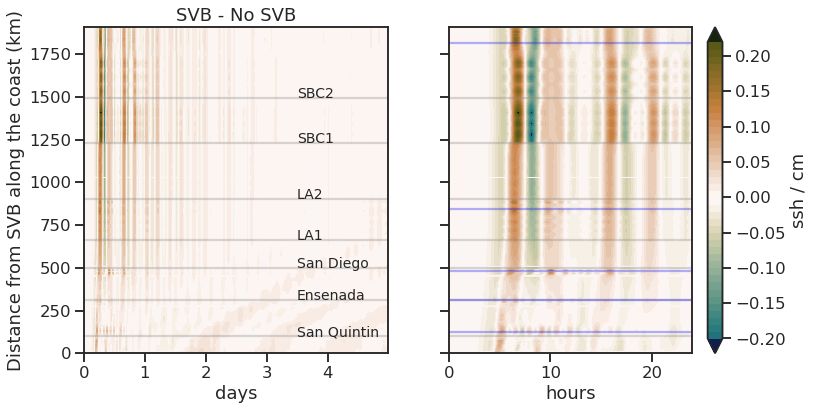

In [3]:
sns.set_style('ticks')
sns.set_context('talk')

fig, (ax,ax2) = plt.subplots(1,2,figsize=(12,6), sharey=True)
ax.set_facecolor('tan')

pc = ax.contourf(sshData.T/(24*3600), 
                   sshData.X,
                   np.transpose((sshData.curtain_data.data-
                                 sshData_noSVB.curtain_data.data)*100),
                   50,vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r, extend='both')

pc2 = ax2.contourf(sshData.T/(3600), 
                sshData.X,
                np.transpose((sshData.curtain_data.data-
                              sshData_noSVB.curtain_data.data)*100),
                   50,vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r, extend='both')
cb = plt.colorbar(pc2,label='ssh / cm')

ax2.set_xlim(0,24)

for km, lab in zip([101,313.7,500, 660, 900, 1231, 1492], ['San Quintin','Ensenada','San Diego','LA1','LA2','SBC1', 'SBC2']):
    ax.axhline(km,color='0.5',alpha=0.3)
    ax.text(3.5,km,lab, fontsize=14)
    ax2.axhline(km,color='0.5',alpha=0.3)
    
for kk, lab in zip([60,150,225,330,520], ['S. Quintín', 'Ensenada','San Diego','Long Beach','Pismo']):
    ax2.axhline(sshData.X[kk], color='blue',alpha=0.3)
  
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax2.set_xlabel('hours')

ax.set_title('SVB - No SVB')

1.4880613854693854
-2.188592726581515


Text(0.5, 1.0, 'with SVB')

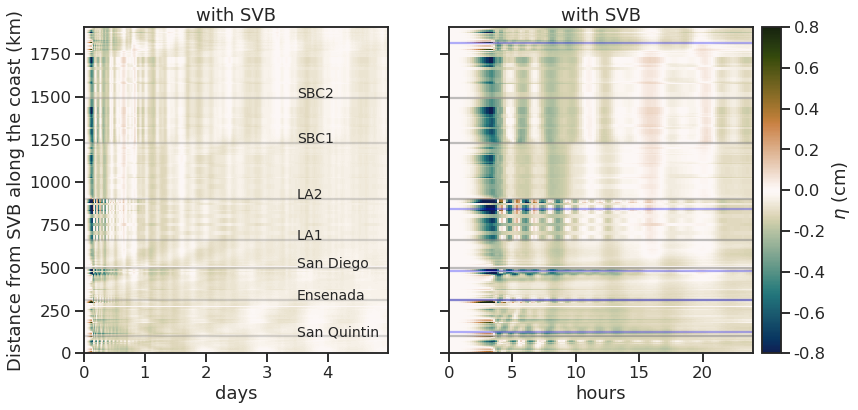

In [4]:
sns.set_style('ticks')
sns.set_context('talk')

vmin = -0.8
vmax = 0.8

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6), sharey=True)

pc = ax1.pcolormesh(sshData.T/(24*3600), 
                    sshData.X,
                    np.transpose((sshData.curtain_data.data)*100),
                    vmin=vmin, vmax=vmax, cmap=cmo.cm.tarn_r)
ax1.set_xlabel('hours')

pc = ax2.pcolormesh(sshData.T/(3600), 
                   sshData.X,
                   np.transpose((sshData.curtain_data.data)*100),
                   vmin=vmin, vmax=vmax, cmap=cmo.cm.tarn_r)

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755]) 
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.tarn_r),
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.1f', label=r'$\eta$ (cm)')

ax2.set_xlim(0,24)

print(np.max(np.transpose((sshData.curtain_data.data)*100)))
print(np.min(np.transpose((sshData.curtain_data.data)*100)))

for km, lab in zip([101,313.7,500, 660, 900, 1231, 1492], ['San Quintin','Ensenada','San Diego','LA1','LA2','SBC1', 'SBC2']):
    ax1.axhline(km,color='0.5',alpha=0.3)
    ax1.text(3.5,km,lab, fontsize=14)
    ax2.axhline(km,color='0.5',alpha=0.5)

for kk, lab in zip([60,150,225,330,520], ['S. Quintín', 'Ensenada','San Diego','Long Beach','Pismo']):
    ax2.axhline(sshData.X[kk], color='blue',alpha=0.3)

ax1.set_ylabel('Distance from SVB along the coast (km)')
ax1.set_xlabel('days')
ax2.set_xlabel('hours')
ax1.set_title('with SVB')
ax2.set_title('with SVB')

(0.0, 24.0)

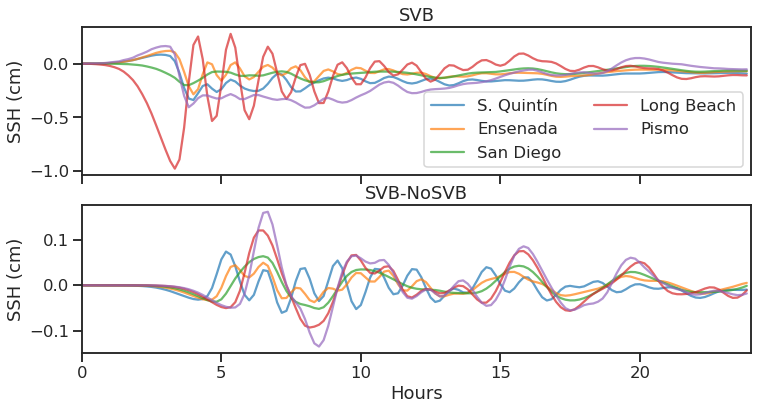

In [5]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,6), sharex=True)

for kk, lab in zip([60,150,225,330,520], ['S. Quintín', 'Ensenada','San Diego','Long Beach','Pismo']):
    ax1.plot(sshData.T[:144]/(3600), (sshData.curtain_data.data[:144,kk])*100, alpha=0.7, label=lab)
    ax2.plot(sshData.T[:144]/(3600), (sshData.curtain_data.data[:144,kk]-
                                      sshData_noSVB.curtain_data.data[:144,kk])*100, alpha=0.7, label=lab)
    
ax1.legend(ncol=2)
ax1.set_ylabel('SSH (cm)')
ax2.set_ylabel('SSH (cm)')
ax2.set_title('SVB-NoSVB')
ax1.set_title('SVB')
ax2.set_xlabel('Hours')
ax2.set_xlim(0,24)

In [52]:
def plot_spectrogram2(ax,timeseries, X, col, lab,kind='linear', title='', xlim=[0,40]):
    samp_freq = 1/600 # 10 min data
    
    freq_per, Pxx_den_per = signal.periodogram(timeseries, samp_freq, detrend='constant', scaling='density')
        
    if kind == 'semilog':
        ax.semilogy(freq_per*(86400), 1E6*Pxx_den_per/(1e4*86400),color=col, alpha=1, label=lab, linewidth=1)
    elif kind=='linear':
        ax.plot(freq_per*(86400), 1E6*Pxx_den_per/(1e4*86400),color=col, alpha=1,linewidth=1,label=lab,)  
    else:
        raise Exception("%s is not a valid value for kind" %kind)
    #print((freq_per[1:]-freq_per[:-1])*86400)
    ax.set_xlim(xlim)
    ax.set_ylabel(r'PSD (10$^{-6}$ m$^2$cpd$^{-1}$)', labelpad=0.1)
    ax.set_xlabel('Frequency (cpd)', labelpad=0.1)
    ax.set_title(title)
    return ax

(1e-08, 1)

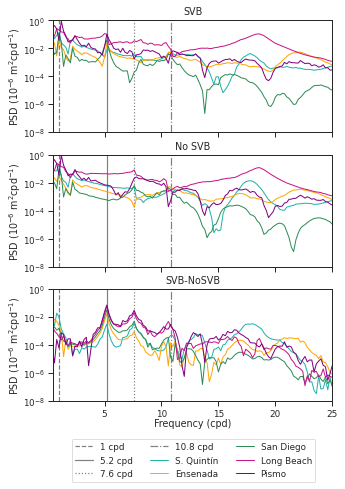

In [54]:
sns.set_context('paper')
kind = 'semilog'

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(5,7), sharex=True)

for ax in [ax1,ax2,ax3]:
    ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
    ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
    ax.axvline(7.6, linestyle=':', color='0.5', label='7.6 cpd')
    ax.axvline(10.8, linestyle='-.', color='0.5', label='10.8 cpd')

colors=['lightseagreen','orange','seagreen','mediumvioletred', 'purple']
for kk, lab, col in zip([60,150,225,330,520], ['S. Quintín', 'Ensenada','San Diego','Long Beach','Pismo'], colors):
    timeseries = (sshData.curtain_data.data[:,kk])*100
    timeseries3 = (sshData.curtain_data.data[:,kk]-
                   sshData_noSVB.curtain_data.data[:,kk])*100
    timeseries2 = (sshData_noSVB.curtain_data.data[:,kk])*100
    
    ax1 = plot_spectrogram2(ax1,timeseries[:],sshData.X[kk], col=col, lab=lab,
                           kind=kind, xlim=[0,25])
    ax2 = plot_spectrogram2(ax2,timeseries2[:],sshData.X[kk], col=col, lab=lab,
                           kind=kind, xlim=[0,25])
    ax3 = plot_spectrogram2(ax3,timeseries3[:],sshData.X[kk], col=col, lab=lab,
                           kind=kind, xlim=[0,25])
    
ax3.legend(ncol=3, bbox_to_anchor=(0.05,-0.3))
ax3.set_title('SVB-NoSVB')
ax1.set_title('SVB')
ax2.set_title('No SVB')

ax3.set_xlabel('Frequency (cpd)')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_xlim(0.5,25)
ax1.set_ylim(1E-8,1)
ax2.set_xlim(0.5,25)
ax2.set_ylim(1E-8,1)
ax3.set_xlim(0.5,25)
ax3.set_ylim(1E-8,1)